In [1]:
import pandas as pd
import os
from result_verification import load_data, convolute, linfilter

In [2]:
di = load_data([os.path.join('data', file) for file in os.listdir('data')])
di

{'plota_logo.csv [40]': {'Setpoint': 40,
  'data': 0     31
  1     29
  2     35
  3     34
  4     35
        ..
  88    51
  89    50
  90    49
  91    49
  92    49
  Name: Output, Length: 93, dtype: int64},
 'plota_logo.csv [60]': {'Setpoint': 60,
  'data': 0     53
  1     57
  2     57
  3     59
  4     59
        ..
  90    65
  91    65
  92    64
  93    64
  94    64
  Name: Output, Length: 95, dtype: int64},
 'plota_logo.csv [80]': {'Setpoint': 80,
  'data': 0     68
  1     71
  2     71
  3     76
  4     73
        ..
  82    81
  83    80
  84    80
  85    80
  86    80
  Name: Output, Length: 87, dtype: int64},
 'plota_logo.csv [117]': {'Setpoint': 117,
  'data': 0      89
  1      91
  2      95
  3      99
  4     100
       ... 
  65    121
  66    117
  67    118
  68    118
  69    118
  Name: Output, Length: 70, dtype: int64},
 'plota_logo.csv [134]': {'Setpoint': 134,
  'data': 0     122
  1     124
  2     128
  3     130
  4     128
       ... 
  58    134


<AxesSubplot: >

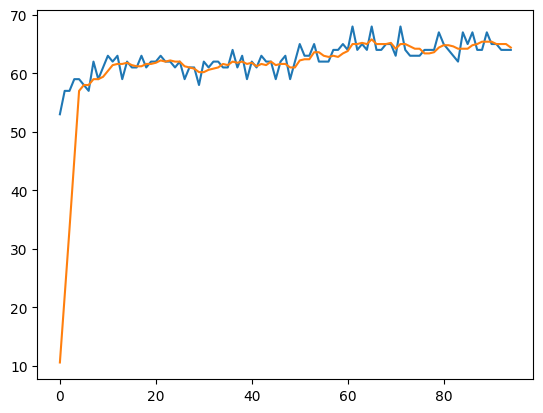

In [7]:
graph = 'plota_logo.csv [60]'
di.get(graph).get('data').plot()
pd.Series(linfilter(di.get(graph).get('data'), 5)).plot()

In [4]:
di_convs = {}
for cv_ct in [2,3,4,5]:
    di_convs[cv_ct] = {}
    for name, info in di.items():
        di_convs[cv_ct][name] = info.copy()
        di_convs[cv_ct][name]['data'] = convolute(di_convs[cv_ct][name].get('data'), cv_ct)
di_convs

{2: {'plota_logo.csv [40]': {'Setpoint': 40,
   'data': 0     30.0
   1     32.0
   2     34.5
   3     34.5
   4     36.0
         ... 
   87    48.5
   88    50.5
   89    49.5
   90    49.0
   91    49.0
   Name: Output, Length: 92, dtype: float64},
  'plota_logo.csv [60]': {'Setpoint': 60,
   'data': 0     55.0
   1     57.0
   2     58.0
   3     59.0
   4     58.5
         ... 
   89    66.0
   90    65.0
   91    64.5
   92    64.0
   93    64.0
   Name: Output, Length: 94, dtype: float64},
  'plota_logo.csv [80]': {'Setpoint': 80,
   'data': 0     69.5
   1     71.0
   2     73.5
   3     74.5
   4     74.0
         ... 
   81    81.5
   82    80.5
   83    80.0
   84    80.0
   85    80.0
   Name: Output, Length: 86, dtype: float64},
  'plota_logo.csv [117]': {'Setpoint': 117,
   'data': 0      90.0
   1      93.0
   2      97.0
   3      99.5
   4     102.5
         ...  
   64    118.5
   65    119.0
   66    117.5
   67    118.0
   68    118.0
   Name: Output, Length: 69, d

In [5]:
import matplotlib.pyplot as plt

plota_logo.csv [40]
93


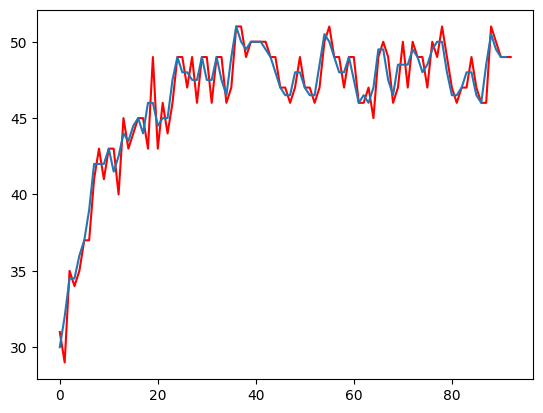

92


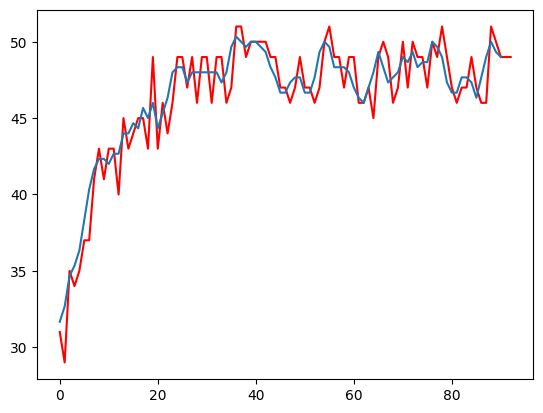

91


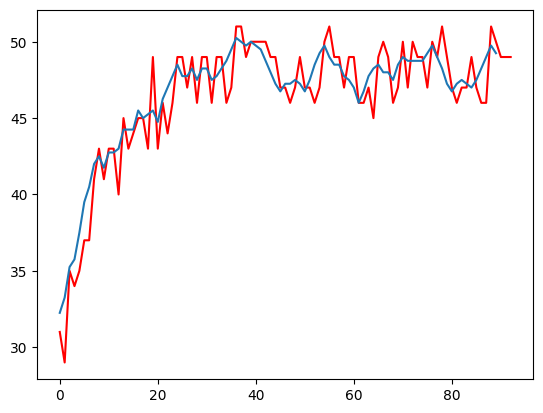

90


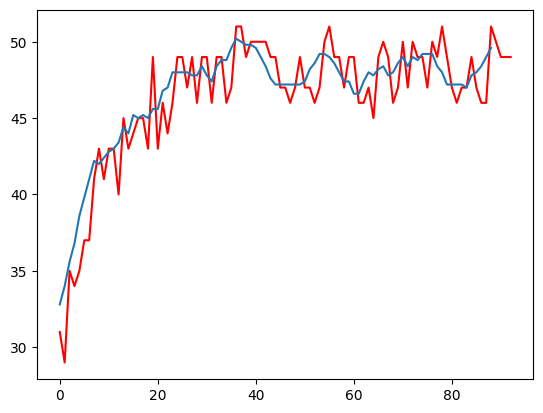

89
plota_logo.csv [60]
95


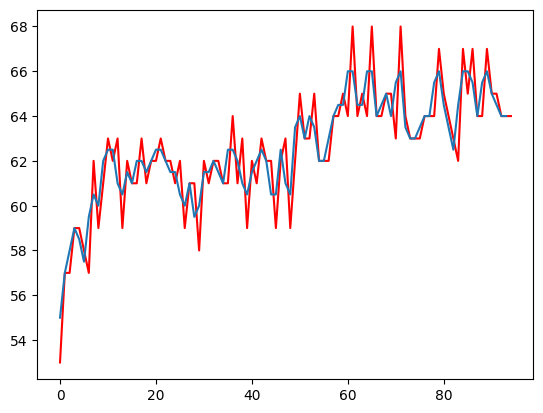

94


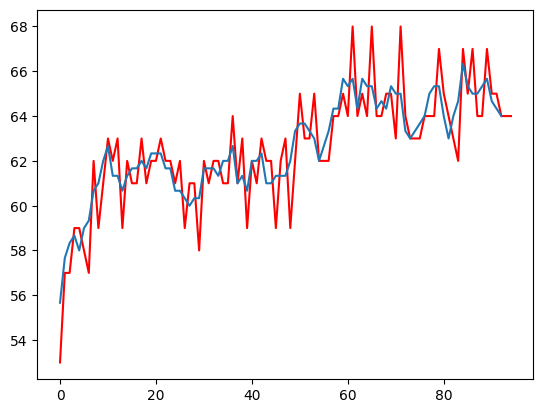

93


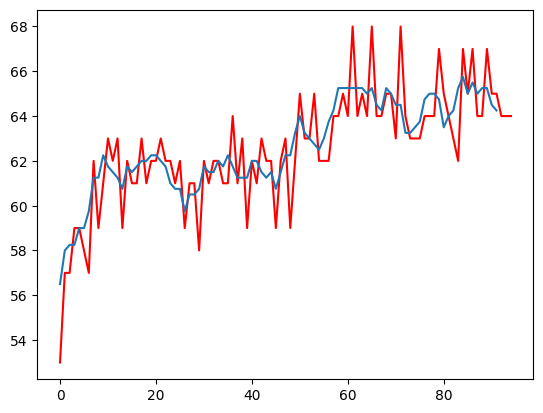

92


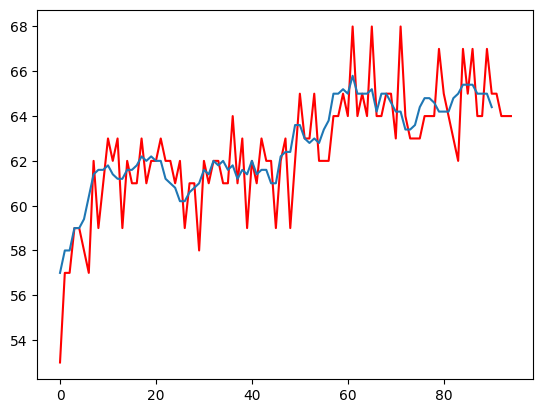

91
plota_logo.csv [80]
87


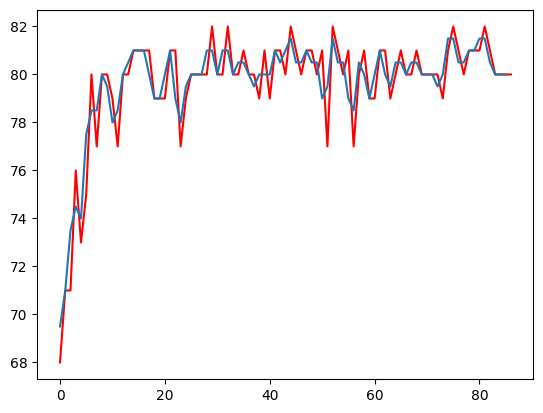

86


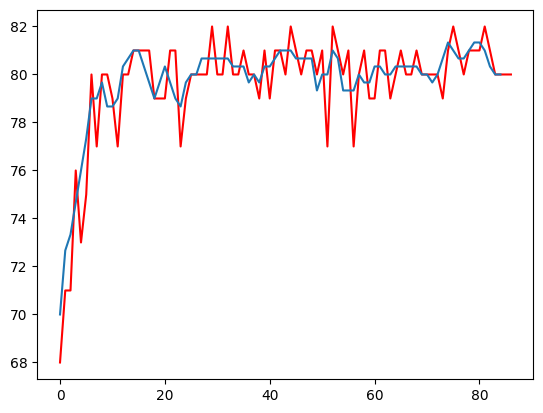

85


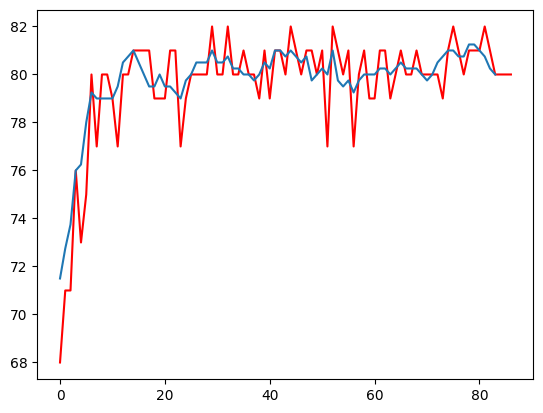

84


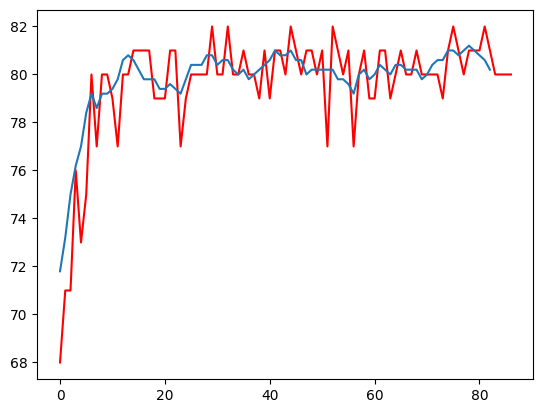

83
plota_logo.csv [117]
70


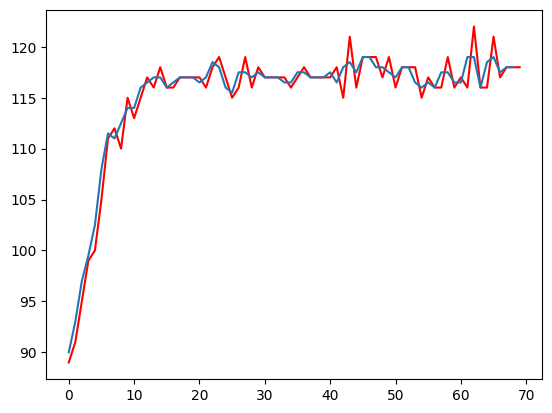

69


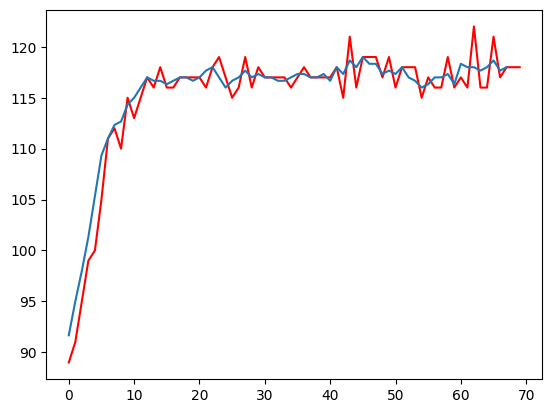

68


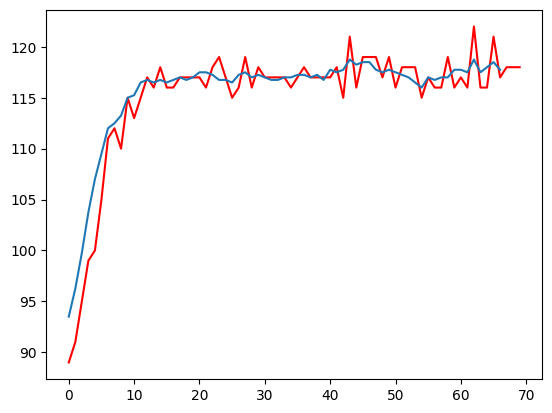

67


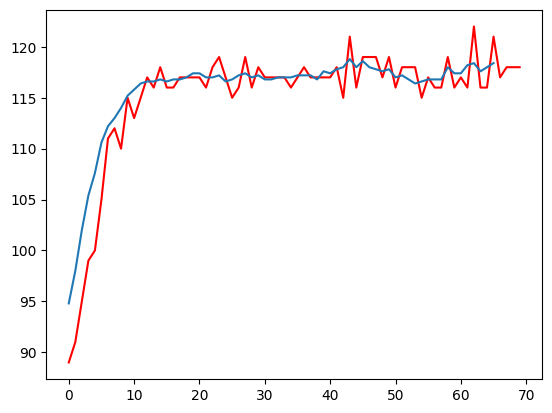

66
plota_logo.csv [134]
63


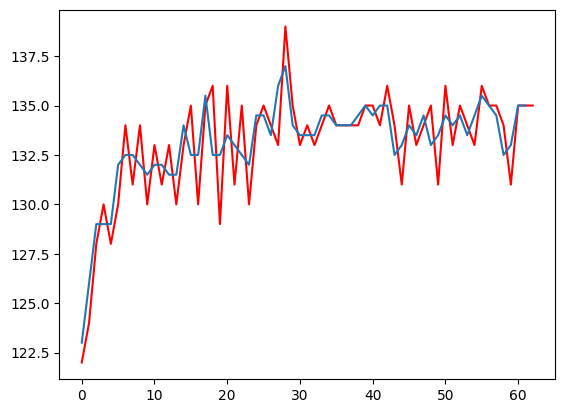

62


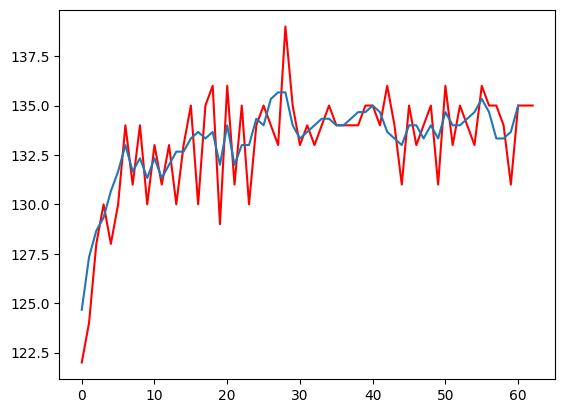

61


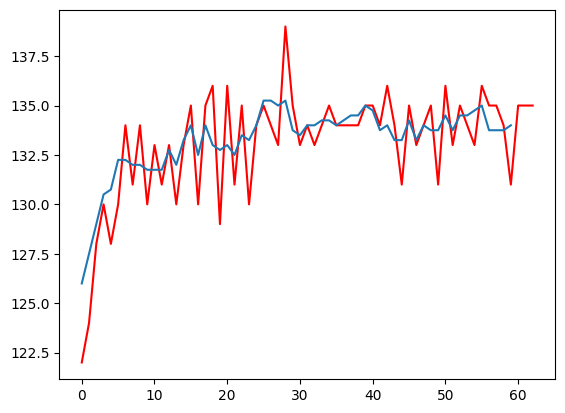

60


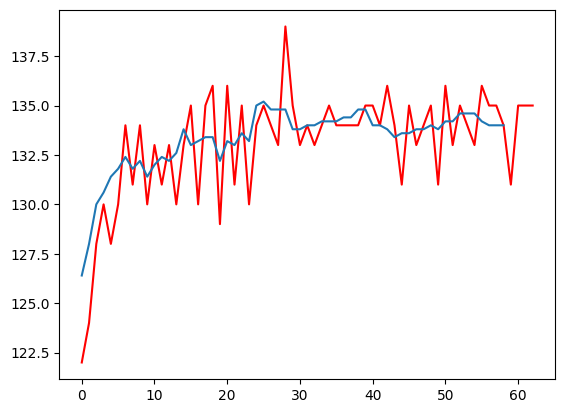

59
plota_logo.csv [151]
54


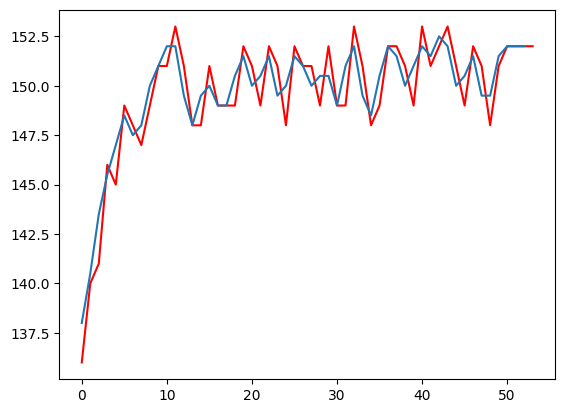

53


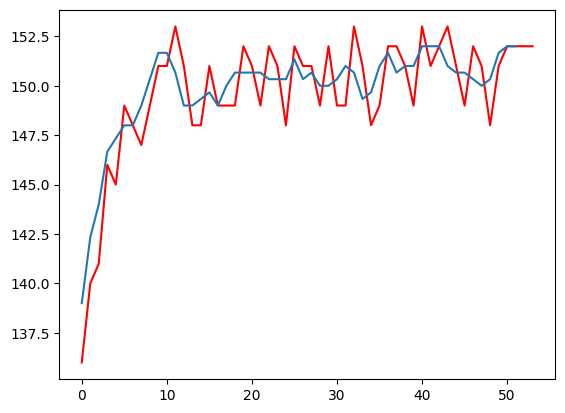

52


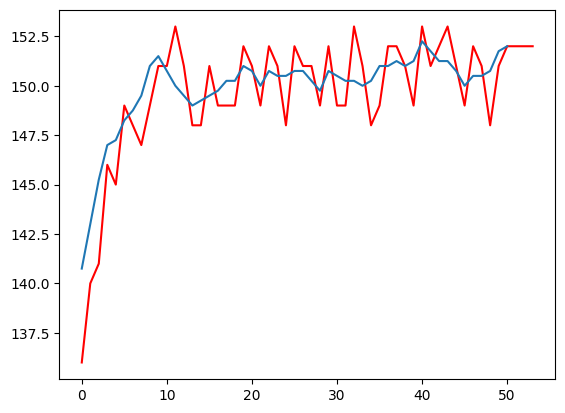

51


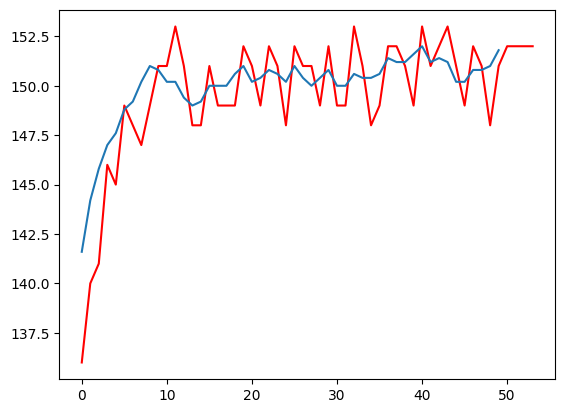

50
plota_logo.csv [175]
61


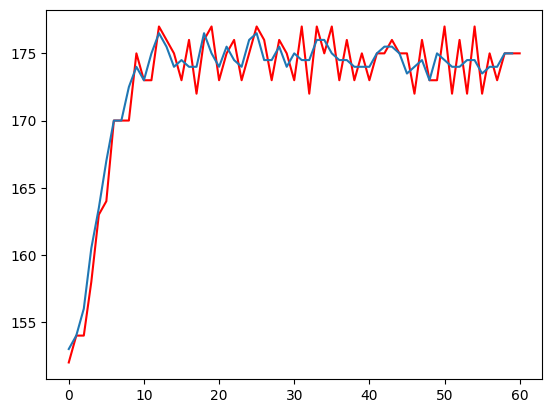

60


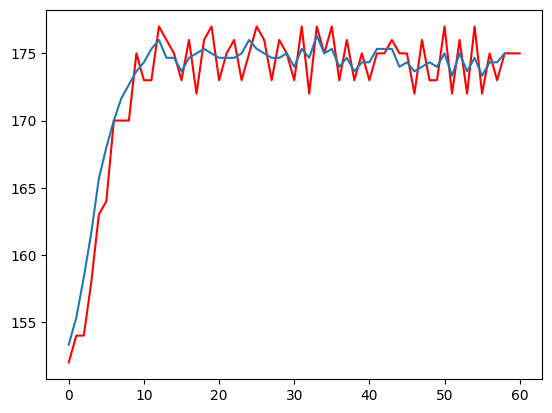

59


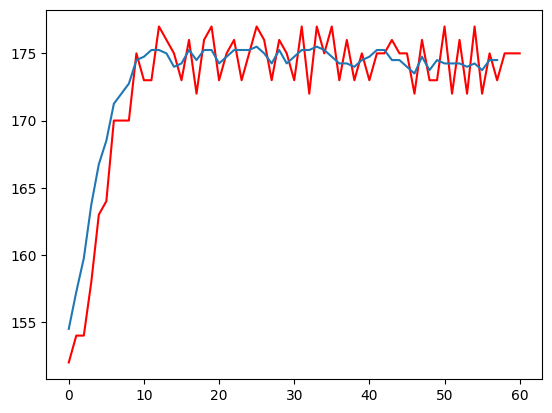

58


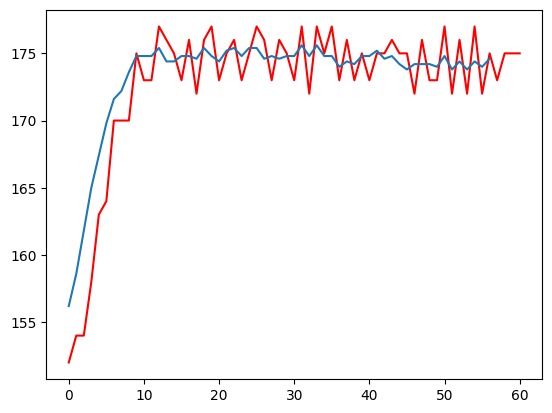

57
plota_logo.csv [182]
33


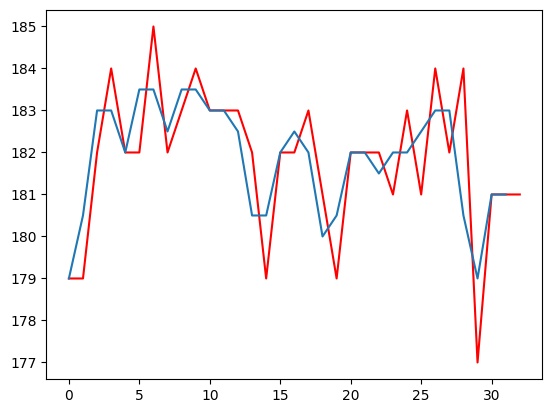

32


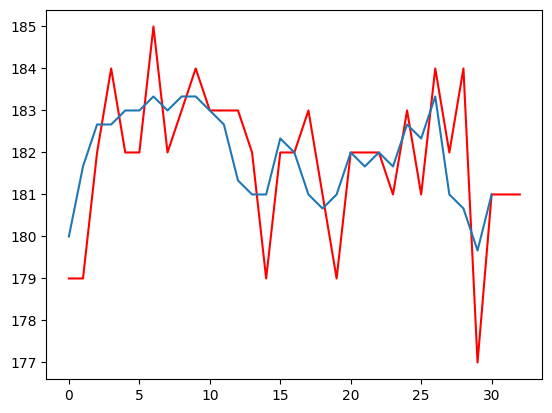

31


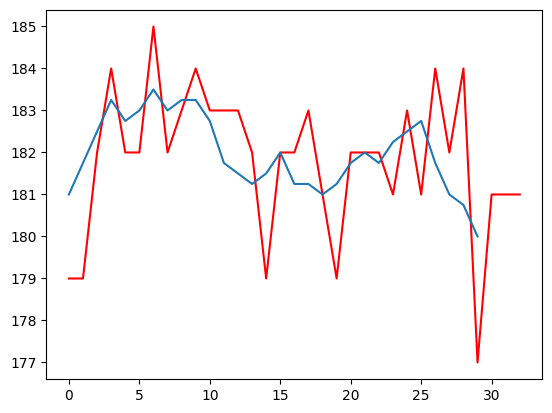

30


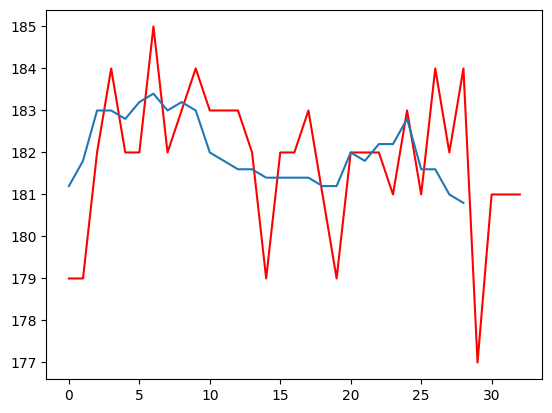

29
plota_logo.csv [189]
41


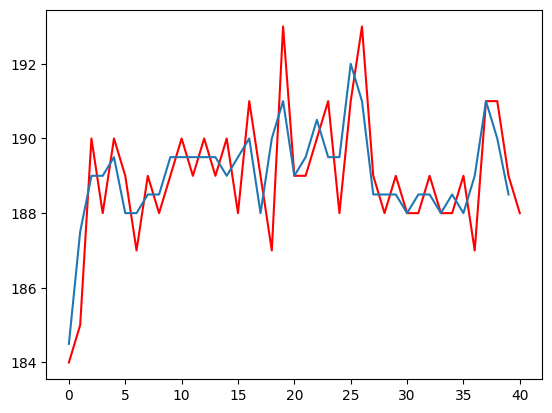

40


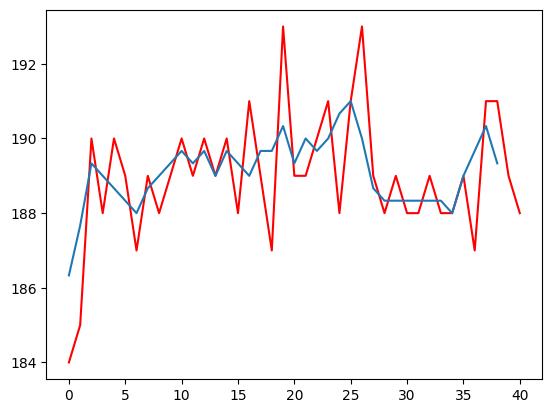

39


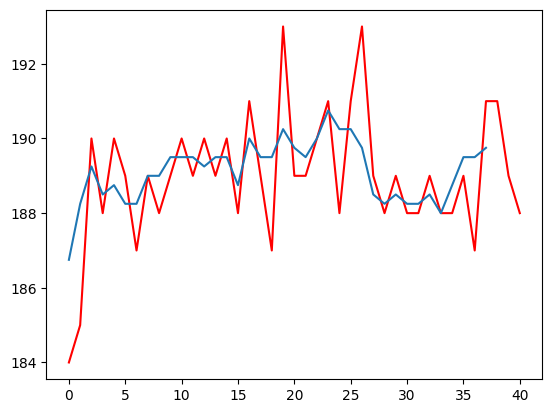

38


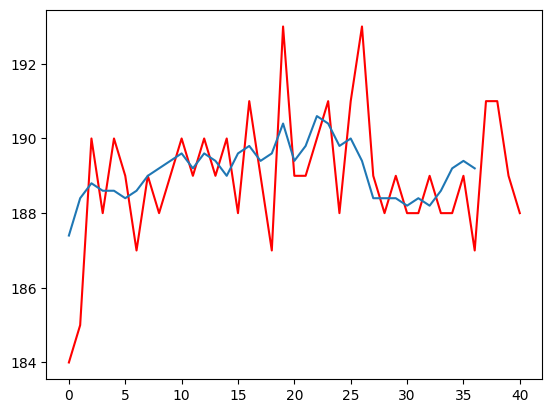

37
plota_muito_tarde.csv [200]
142


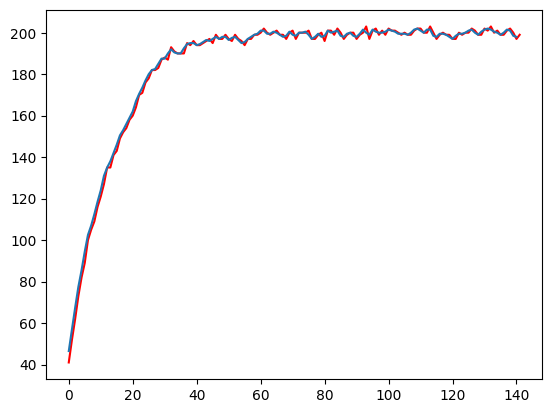

141


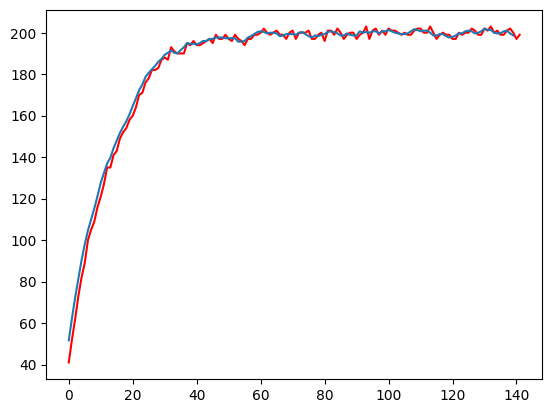

140


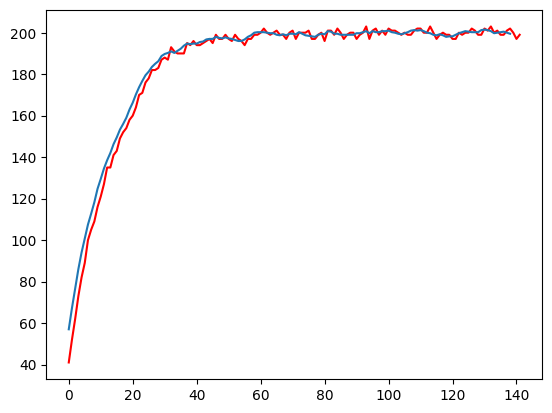

139


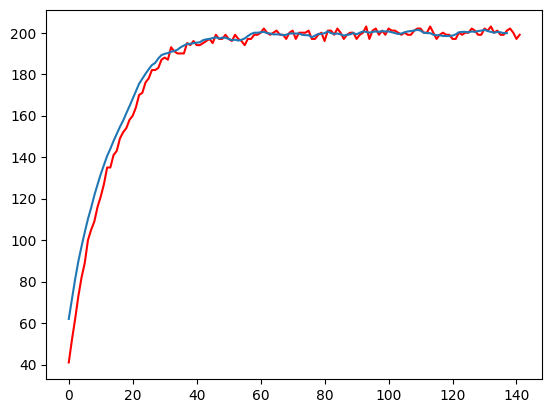

138
plota_nao_tao_cedo.csv [90]
119


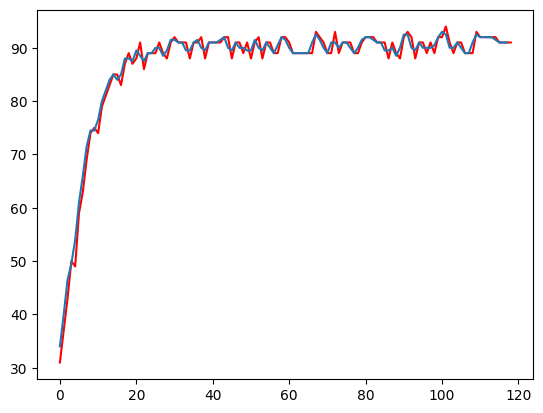

118


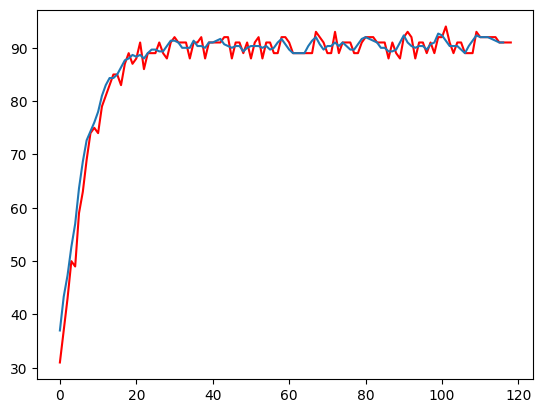

117


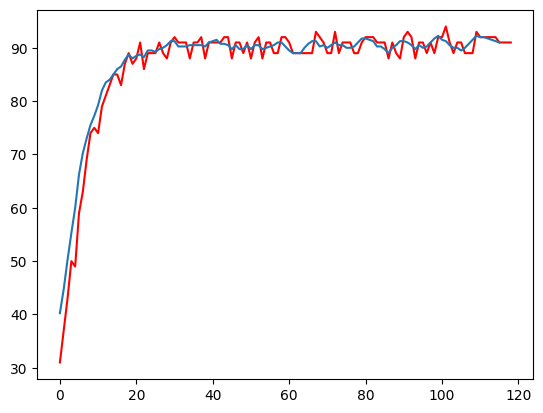

116


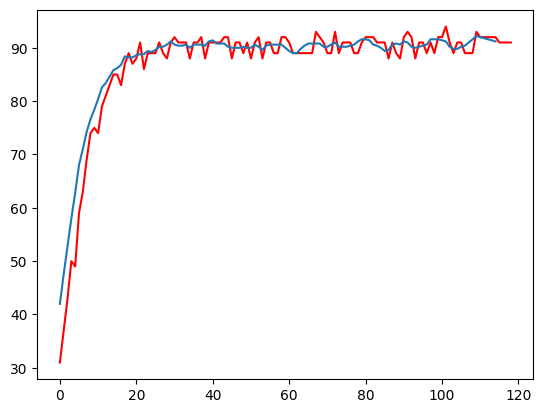

115
plota_nao_tao_cedo.csv [158]
177


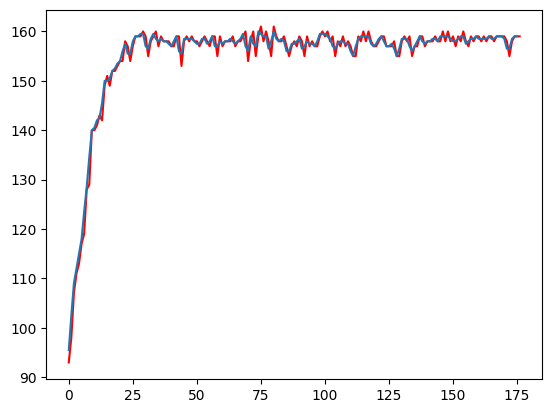

176


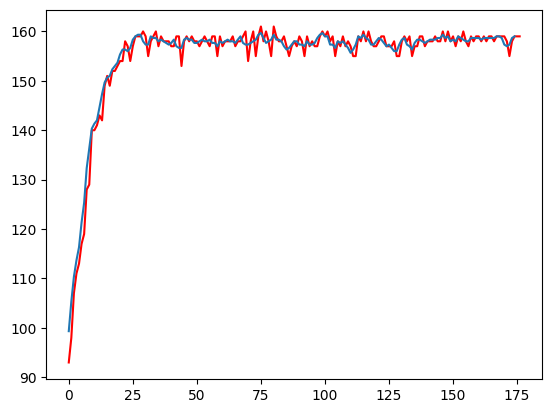

175


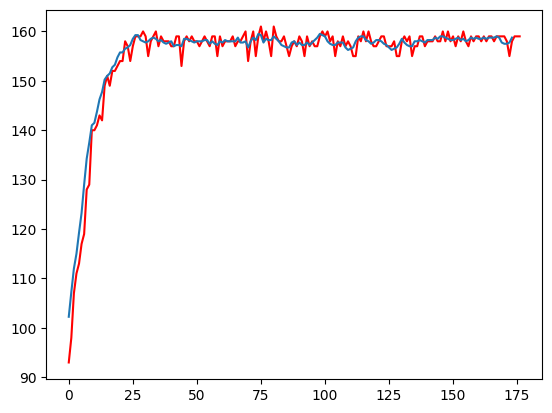

174


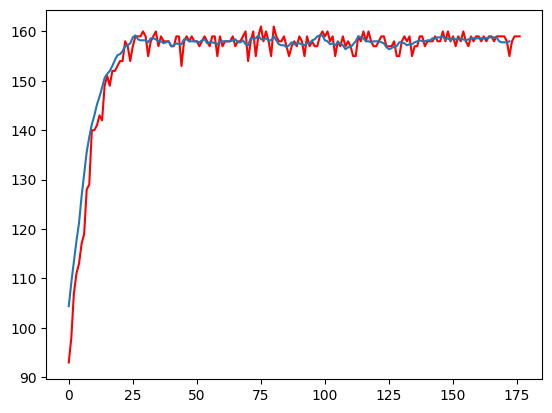

173
plota_nao_tao_cedo.csv [200]
81


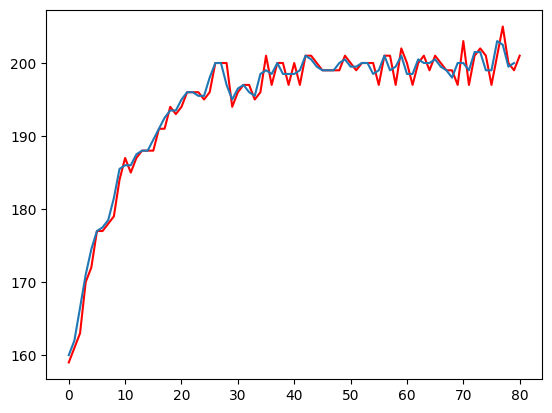

80


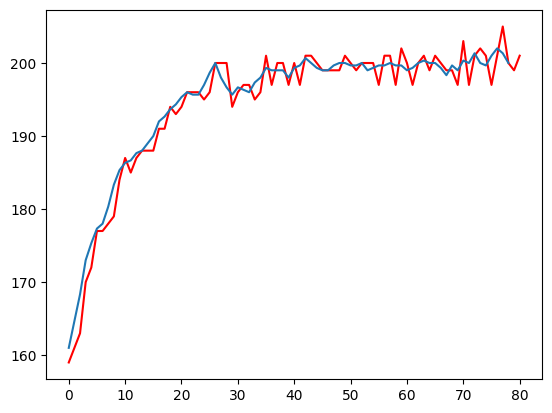

79


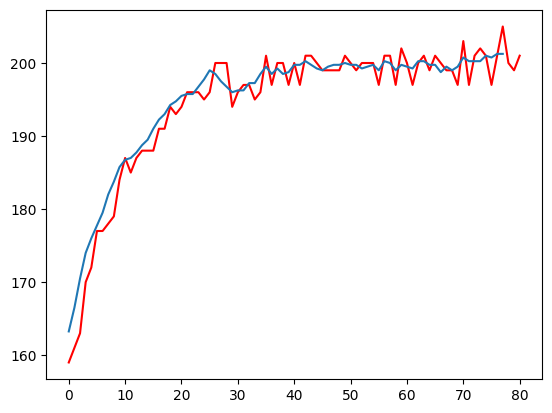

78


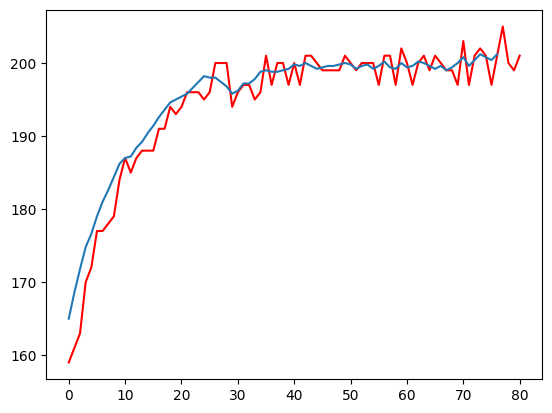

77
plota_nao_tao_tarde.csv [110]
99


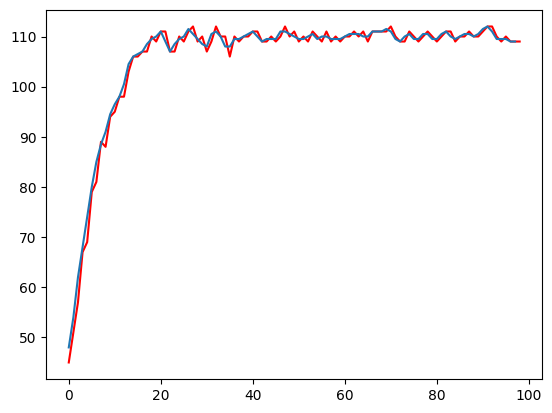

98


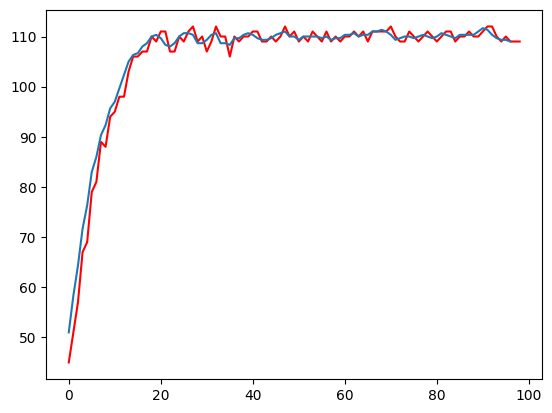

97


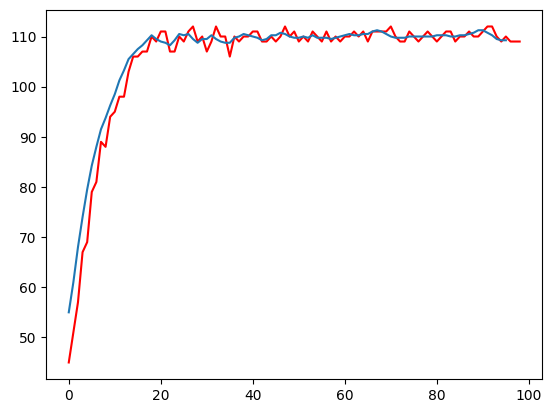

96


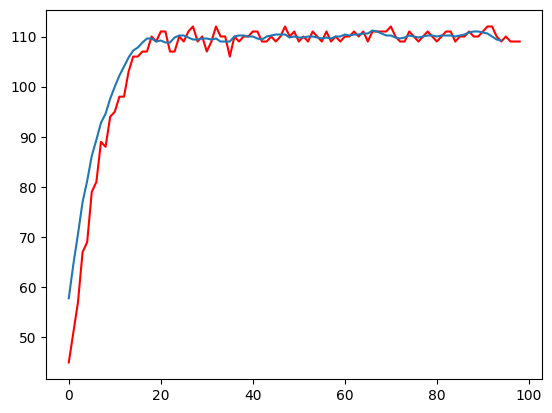

95
plota_nao_tao_tarde.csv [178]
147


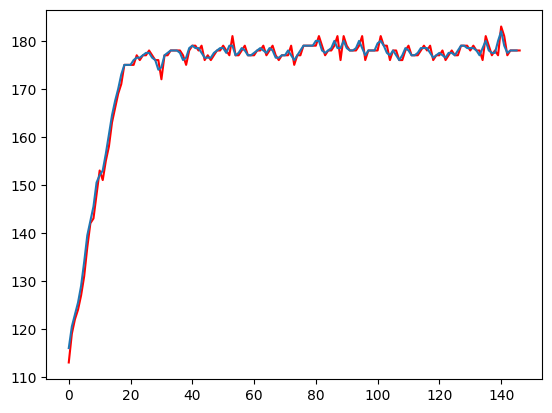

146


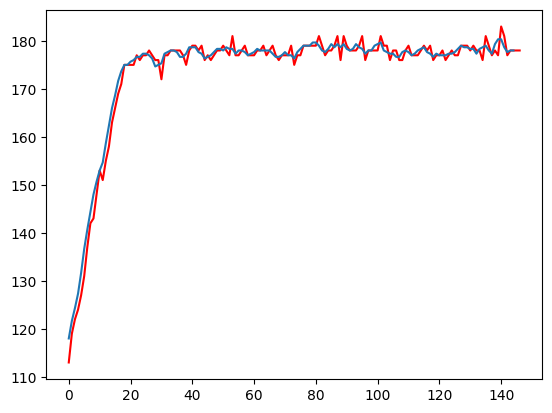

145


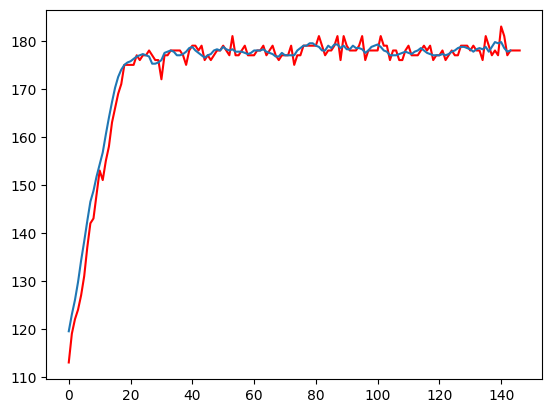

144


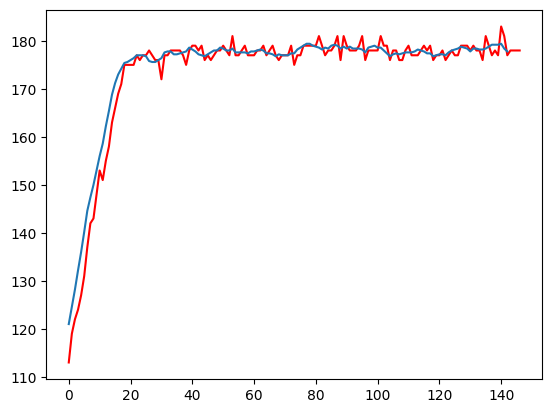

143


In [6]:
for name, info in di.items():
    print(name)
    # info.get('data').plot(color='red')
    # plt.show()
    print(len(info.get('data')))
    for conv_di in di_convs.values():
        # print(conv_di)
        info.get('data').plot(color='red')
        conv_di[name].get('data').plot()
        plt.show()
        print(len(conv_di[name].get('data')))
    # plt.show()